Import a specific job from datasets

retrieving C:\Users\a770398\IO-SEA\io-sea-3.4-analytics\dataset_generation\dataset_generation\dataset_gysela\job_109567.csv
(3242, 5)


<AxesSubplot:>

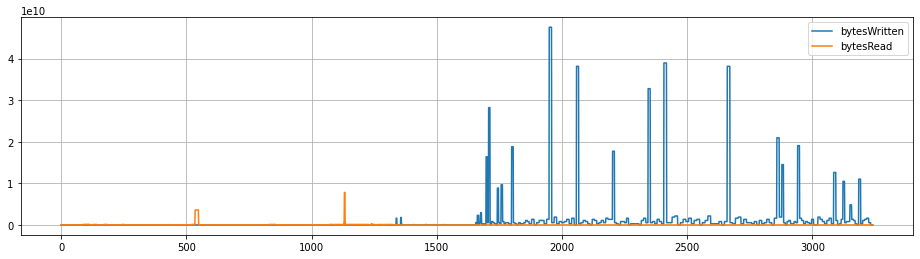

In [4]:
from utils import *
import pwlf
import ruptures as rpt

df = get_df_by_job_id(job_id=109567)
#df = get_df_by_job_id(job_id=101329)
print(df.shape)
df.plot(y=["bytesWritten", "bytesRead"], figsize=(16,4), sharex=True, grid=True, use_index=True)

# df.plot(y=["bytesWritten", "bytesRead"], figsize=(16,4), sharex=True, grid=True, use_index=True, logy=True)


Kmeans for baseline and upper line detection


In [16]:
from sklearn.cluster import KMeans
import ruptures as rpt
%matplotlib tk
from utils import *
signal = (df[["bytesWritten"]]).to_numpy()
x = df[["timestamp"]].to_numpy()
v0_weight = 1
v0_threshold = 0.05
n_clusters = 2
while v0_weight > v0_threshold:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(signal)
    v0_indexes = np.where(kmeans.labels_==0, True, False)
    v0_weight = signal[v0_indexes].sum() / signal.sum()
    n_clusters += 1
print(f"{n_clusters = }")
print(f"{v0_weight = }")

ab = np.arange(len(x))
breakpoints = ab[np.insert(np.where(np.diff(kmeans.labels_)!=0, True, False), 0, False)]
changes=x[np.insert(np.where(np.diff(kmeans.labels_)!=0, True, False), 0, False)]
print(changes.shape)
# plt.plot(x, signal)
# for x_ in changes:
#     plt.axvline(x=x_, color="green", linestyle='dashed', linewidth=0.5)
# plt.grid(True)
print(breakpoints)
plot_job_phases2(x, signal, breakpoints)

n_clusters = 15
v0_weight = 0.0007625933258590361
(159, 1)
[1131 1134 1239 1242 1338 1341 1356 1359 1656 1659 1662 1668 1671 1675
 1679 1683 1687 1692 1697 1702 1707 1713 1719 1725 1737 1742 1747 1757
 1763 1769 1793 1799 1806 1820 1827 1855 1869 1879 1889 1899 1909 1929
 1939 1949 1959 1969 1979 1989 1999 2009 2019 2029 2039 2049 2058 2067
 2085 2103 2112 2121 2130 2139 2157 2166 2175 2202 2210 2226 2234 2250
 2258 2266 2274 2308 2317 2326 2335 2344 2353 2362 2371 2380 2389 2398
 2407 2418 2440 2462 2473 2484 2495 2506 2517 2528 2539 2550 2561 2572
 2583 2594 2627 2638 2649 2660 2671 2693 2715 2726 2737 2768 2778 2788
 2798 2818 2828 2838 2848 2858 2868 2878 2885 2892 2899 2913 2927 2934
 2941 2949 2957 2965 2973 2981 2997 3005 3022 3040 3049 3058 3067 3076
 3085 3094 3101 3108 3115 3122 3129 3136 3150 3157 3164 3171 3178 3185
 3193 3201 3209 3225 3233]


reconstruction


In [11]:
%matplotlib tk
def reconstruct_pwlf(signal, breakpoints):
    ab = np.arange(len(signal))
    my_pwlf = pwlf.PiecewiseLinFit(ab, signal, degree=0)
    my_pwlf.fit_with_breaks(breakpoints)
    return my_pwlf.predict(ab)
    

def show_breakpoints(signal, breakpoints, breakpoints2=[]):
    ab = np.arange(len(signal))
    p_signal = reconstruct_pwlf(signal, breakpoints)

    #plt.plot(ab, p_signal, linestyle='dashed', linewidth=0.5)
    for bpt in breakpoints:
        plt.axvline(x=bpt, linestyle='dashed', linewidth=0.7, color="black")
    if breakpoints2:
        for bpt in breakpoints2:
            plt.axvline(x=bpt, linestyle='dashed', linewidth=0.7, color="red")
        
    plt.plot(ab, signal, label="original signal")
    plt.show()
    
    
    
def show_reconstruction(signal, p_signal):
    ab = np.arange(len(signal))
    plt.plot(ab, signal, label="original signal")
    plt.plot(ab, p_signal, label="decomposed signal", linewidth=0.7, linestyle="dashed", color="black")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.figure(0)
    plt.plot(ab, np.cumsum(signal), label="original signal")
    plt.plot(ab, np.cumsum(p_signal), label="decomposed signal",  
            linewidth=0.7, linestyle="dashed", color="black")
    plt.grid(True)
    plt.show()

signal = (df[["bytesWritten"]]).to_numpy()
breakpoints = get_kmeans_breakpoints(signal, v0_threshold = 0.15)
breakpoints2 = get_kmeans_original_breakpoints(signal)
show_breakpoints(signal, breakpoints, breakpoints2=breakpoints2)
# p_signal = reconstruct_pwlf(signal, breakpoints)
# show_reconstruction(signal, p_signal)

<class 'numpy.ndarray'>
[0 0 0 ... 0 0 0]


In [33]:
# reconstruction
import pwlf
from utils import get_kmeans_breakpoints, choose_random_job
#breakpoints = get_kmeans_breakpoints(signal, v0_threshold=0.05)
csv_file = choose_random_job()
print(csv_file)
df = pd.read_csv(csv_file, index_col=0)
signal = (df[["bytesWritten"]]).to_numpy()

decompose_signal(signal)

C:\Users\a770398\IO-SEA\io-sea-3.4-analytics\dataset_generation\dataset_generation\dataset_genji_IOI_BD260919\job_488287.csv
<class 'numpy.ndarray'>
[  239   249  1184  1211  3400  3422  3786  3812  4150  4176  4332  4358
  5568  5604  5640  5712  5928  5964  6036  6072  6144  6180  6216  6288
  6324  6468  6504  6576  6648  6792  7080  7152  7224  7260  7332  7404
  7440  7476  7512  7548  7584  7656  7764  7800  7980  8016  8232  8268
  8412  8448  8484  8556  8592  8628  8664  8841  8844  8847  8850  8877
  8880  8898  8901  8946  8949  8967  9075  9078  9281  9295  9337  9351
  9435  9463  9477  9491  9505  9519  9547  9675  9683 10147 10155 10212
 10237 10812 10837 11087 11137 11187 11212 11312 11337 11387 11412]


In [36]:
from utils import get_df_by_job_id
df = get_df_by_job_id(job_id=93537)
signal = (df[["bytesWritten"]]).to_numpy()
decompose_signal(signal)

retrieving C:\Users\a770398\IO-SEA\io-sea-3.4-analytics\dataset_generation\dataset_generation\dataset_valid_dumps\job_93537.csv
<class 'numpy.ndarray'>
[55 70]


Apply "best" stat algo on this signal

In [54]:
signal = (df[["bytesWritten"]]).to_numpy()
x = df[["timestamp"]].to_numpy().tolist()
_, optimal_breakpoints, _ = get_optimal_breakpoints(signal, algo=rpt.KernelCPD, kernel="linear")
plot_job_phases2(x, signal, optimal_breakpoints)

In [45]:
signal = np.log(1+df[["bytesWritten"]]).to_numpy()
x = df[["timestamp"]].to_numpy().tolist()
_, optimal_breakpoints, _ = get_optimal_breakpoints(signal, algo=rpt.KernelCPD, kernel="rbf")
plot_job_phases2(x, signal, optimal_breakpoints)

Let now fit the signal with rect curve

In [52]:
import numpy as np
import pwlf

x = df[["timestamp"]].to_numpy().flatten()
x0 = np.take(x, optimal_breakpoints[:-1], axis=0)
#x0 = np.array([min(x), ])
signal = (df[["bytesWritten"]]).to_numpy().flatten()
print(x.shape)
print(signal.shape)
print(x0.shape)
my_pwlf = pwlf.PiecewiseLinFit(x, signal, degree=0)
my_pwlf.fit_with_breaks(x0)
p_signal = my_pwlf.predict(x)

plt.rcParams["figure.figsize"] = (12, 5)
plt.plot(x, p_signal, x, signal)
plt.grid(True)


(55,)
(55,)
(2,)


On the log signal

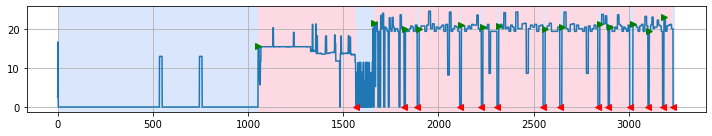

In [13]:
signal = np.log(1 + df[["bytesWritten"]]).to_numpy()
x = df[["timestamp"]].to_numpy().tolist()
_, optimal_breakpoints, _ = get_optimal_breakpoints(signal, algo=rpt.KernelCPD, kernel="linear")
plot_job_phases2(x, signal, optimal_breakpoints)

Switching to signal processing (curve fitting)

In [ ]:
y = df[["bytesWritten"]].to_numpy()
x = df[["timestamp"]].to_numpy()